<a href="https://colab.research.google.com/github/fggrava/Challenge_ONE_Data_Science_TelecomX/blob/main/Challenge_ONE_Data_Science_TelecomX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracão

In [1]:
# importar bibliotecas  Pandas, Seaborn, Matplotlib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, clear_output
import time
import os

In [2]:
# importar os dados do arquivo json, do github fornecido pelo curso
url = ('https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json')
df = pd.read_json(url)
df.head(15)

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
5,0013-MHZWF,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
6,0013-SMEOE,No,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Two year', 'PaperlessBilling': '..."
7,0014-BMAQU,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Two year', 'PaperlessBilling': '..."
8,0015-UOCOJ,No,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
9,0016-QLJIS,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


#🔧 Transformação

In [7]:
# Normalizar o dataframe
dados_normalizados = pd.json_normalize(df.to_dict('records'), sep='_')
dados_normalizados.head(5)

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [8]:
# Lista das colunas que precisam de validação 'No', 'Yes'
colunas_para_limpar = [
    'Churn', 'phone_MultipleLines', 'internet_OnlineSecurity',
    'internet_OnlineBackup', 'internet_DeviceProtection',
    'internet_TechSupport', 'internet_StreamingTV', 'internet_StreamingMovies'
]

# Dicionário para armazenar resumo de ajustes
summario = {}

# Para cada coluna, ajustar os valores inválidos
for coluna in colunas_para_limpar:
    # Máscara booleana para valores inválidos
    invalid_mask = ~dados_normalizados[coluna].isin(['Yes', 'No'])

    # Contar quantos são inválidos
    numerar_as_invalidas = invalid_mask.sum()

    # Guardar no resumo
    summario[coluna] = int(numerar_as_invalidas)

    # Se houver inválidos, ajustar
    if numerar_as_invalidas > 0:
        print(f"Ajustando {numerar_as_invalidas} valores inválidos na coluna '{coluna}'...")
        dados_normalizados.loc[invalid_mask, coluna] = 'No'
        time.sleep(2)
        clear_output(wait=True)

# ✅ Resumo final
print("✅ Todos os valores foram ajustados!\n")
print("🔎 Resumo de ajustes realizados:")


✅ Todos os valores foram ajustados!

🔎 Resumo de ajustes realizados:


In [10]:
# informações das colunas do dataframe
print("Tipos de dados das colunas do dataframe: \n\n")
dados_normalizados.info()




Tipos de dados das colunas do dataframe: 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  inte

In [11]:

# Criar a coluna 'Contas_Diarias' dividindo 'account_Charges_Monthly' por 30
dados_normalizados['Contas_Diarias'] = round(dados_normalizados['account_Charges_Monthly'] / 30,2)

# 10 primeiras linhas do dataframe
print("\n\nDataFrame com a nova coluna 'Contas_Diarias':\n", dados_normalizados.head(10))



DataFrame com a nova coluna 'Contas_Diarias':
    customerID Churn customer_gender  customer_SeniorCitizen customer_Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   
5  0013-MHZWF    No          Female                       0               No   
6  0013-SMEOE    No          Female                       1              Yes   
7  0014-BMAQU    No            Male                       0              Yes   
8  0015-UOCOJ    No          Female                       1               No   
9  0016-QLJIS    No          Female                       0              Yes   

  customer_Dependents  customer_tenure phone_PhoneService phone_Multip

In [12]:
# informações das colunas do dataframe
print("Tipos de dados das colunas do dataframe: \n\n")
dados_normalizados.info()

# Lista das colunas que precisam se tornar booleanas
colunas_para_limpar = [
    'Churn', 'phone_MultipleLines', 'internet_OnlineSecurity',
    'internet_OnlineBackup', 'internet_DeviceProtection',
    'internet_TechSupport', 'internet_StreamingTV', 'internet_StreamingMovies'
]

# Mapear 'Yes' ou 'No' nas colunas e transformar em booleanas
for i in colunas_para_limpar:
    dados_normalizados[i] = dados_normalizados[i].map({'Yes': True, 'No': False}).fillna(False)

# Transformar a coluna 'account_Charges_Total' em float
dados_normalizados['account_Charges_Total'] = dados_normalizados['account_Charges_Total'].apply(lambda x: str(x).replace('$', '').replace(',', '').strip())
dados_normalizados['account_Charges_Total'] = pd.to_numeric(dados_normalizados['account_Charges_Total'], errors='coerce')
dados_normalizados['account_Charges_Total'] = dados_normalizados['account_Charges_Total'].astype(float)

# informações das colunas do dataframe
print("\n\n\nTipos de dados das colunas do dataframe: \n\n")
dados_normalizados.info()

Tipos de dados das colunas do dataframe: 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  inte

In [13]:
# Salvar o dataframe normalizado em um arquivo.csv
dados_normalizados.to_csv('TelecomX_Data_normalizado.csv', index=False)

#mostrar os 10 primeiros registros
dados_normalizados.head(10)

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total,Contas_Diarias
0,0002-ORFBO,False,Female,0,Yes,Yes,9,Yes,False,DSL,...,False,True,True,False,One year,Yes,Mailed check,65.60,593.30,2.19
1,0003-MKNFE,False,Male,0,No,No,9,Yes,True,DSL,...,False,False,False,True,Month-to-month,No,Mailed check,59.90,542.40,2.00
2,0004-TLHLJ,True,Male,0,No,No,4,Yes,False,Fiber optic,...,True,False,False,False,Month-to-month,Yes,Electronic check,73.90,280.85,2.46
3,0011-IGKFF,True,Male,1,Yes,No,13,Yes,False,Fiber optic,...,True,False,True,True,Month-to-month,Yes,Electronic check,98.00,1237.85,3.27
4,0013-EXCHZ,True,Female,1,Yes,No,3,Yes,False,Fiber optic,...,False,True,True,False,Month-to-month,Yes,Mailed check,83.90,267.40,2.80
5,0013-MHZWF,False,Female,0,No,Yes,9,Yes,False,DSL,...,False,True,True,True,Month-to-month,Yes,Credit card (automatic),69.40,571.45,2.31
6,0013-SMEOE,False,Female,1,Yes,No,71,Yes,False,Fiber optic,...,True,True,True,True,Two year,Yes,Bank transfer (automatic),109.70,7904.25,3.66
7,0014-BMAQU,False,Male,0,Yes,No,63,Yes,True,Fiber optic,...,False,True,False,False,Two year,Yes,Credit card (automatic),84.65,5377.80,2.82
8,0015-UOCOJ,False,Female,1,No,No,7,Yes,False,DSL,...,False,False,False,False,Month-to-month,Yes,Electronic check,48.20,340.35,1.61
9,0016-QLJIS,False,Female,0,Yes,Yes,65,Yes,True,DSL,...,True,True,True,True,Two year,Yes,Mailed check,90.45,5957.90,3.02


#📊 Carga e análise

In [14]:
# Análise descritiva das variáveis numéricas
print("Análise Descritiva das Variáveis Numéricas:\n")
print(dados_normalizados.describe())

# Análise descritiva das variáveis categóricas (frequência e contagem)
print("\nAnálise Descritiva das Variáveis Categóricas:\n")
for col in dados_normalizados.select_dtypes(include='object').columns[1:]:
    print(f"\nColuna: {col}")
    print(dados_normalizados[col].value_counts())
    print("-" * 30)

Análise Descritiva das Variáveis Numéricas:

       customer_SeniorCitizen  customer_tenure  account_Charges_Monthly  \
count             7267.000000      7267.000000              7267.000000   
mean                 0.162653        32.346498                64.720098   
std                  0.369074        24.571773                30.129572   
min                  0.000000         0.000000                18.250000   
25%                  0.000000         9.000000                35.425000   
50%                  0.000000        29.000000                70.300000   
75%                  0.000000        55.000000                89.875000   
max                  1.000000        72.000000               118.750000   

       account_Charges_Total  Contas_Diarias  
count            7256.000000     7267.000000  
mean             2280.634213        2.157292  
std              2268.632997        1.004407  
min                18.800000        0.610000  
25%               400.225000        1.180000

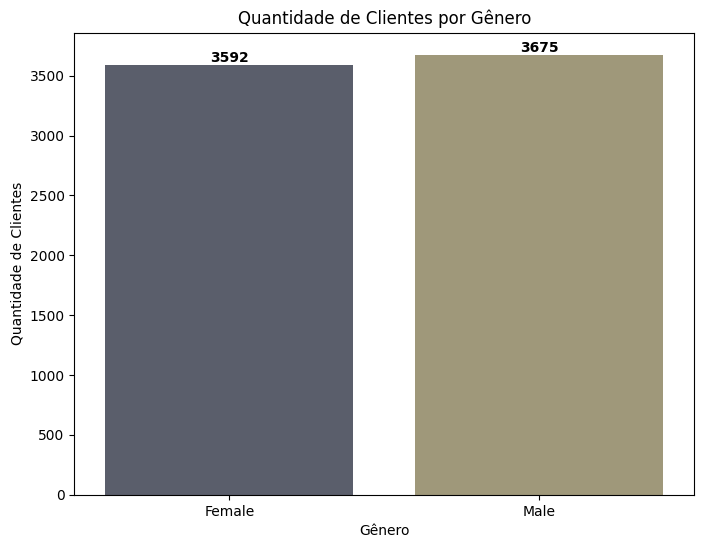

In [17]:
plt.figure(figsize=(8, 6))
# Gráfico de barras
ax = sns.countplot(x='customer_gender', data=dados_normalizados, palette='cividis', hue='customer_gender', legend='auto')
# Contagem por gênero
counts = dados_normalizados['customer_gender'].value_counts()
# Adicionar rótulos no topo das barras
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom',
                fontsize=10, fontweight='bold', color='black')

plt.title('Quantidade de Clientes por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Quantidade de Clientes')
plt.show()

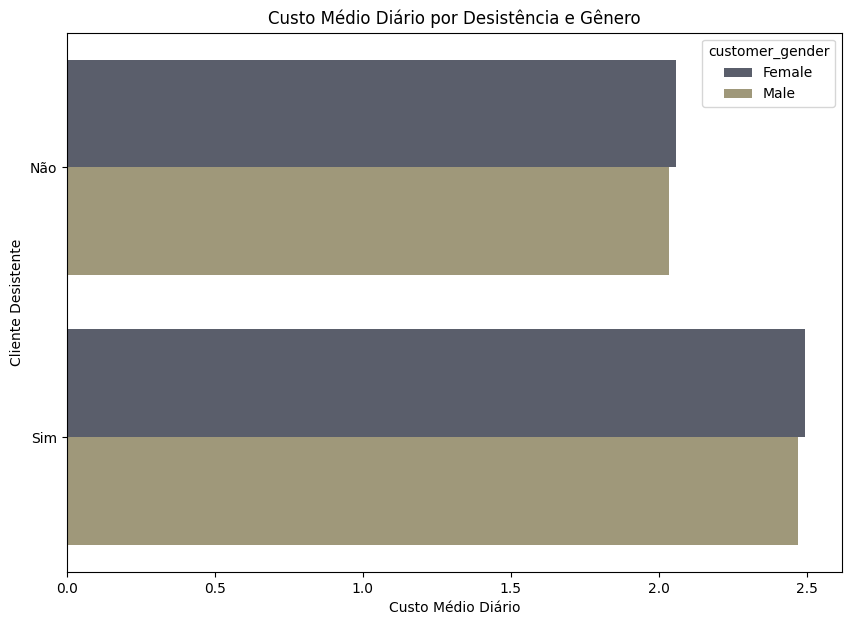

In [18]:
# prompt: Gráfico de barra horizontal usando a seaborn, mostrando a relação entre as colunas, churn, genero e custo diario

# Agrupar por 'Churn' e 'customer_gender' e calcular a média do 'Contas_Diarias'
churn_gender_daily_charge = dados_normalizados.groupby(['Churn', 'customer_gender'])['Contas_Diarias'].mean().reset_index()

churn_gender_daily_charge['Churn'] = churn_gender_daily_charge['Churn'].map({True: 'Sim', False: 'Não'})

# Criar o gráfico de barra horizontal
plt.figure(figsize=(10, 7))
sns.barplot(x='Contas_Diarias', y='Churn', hue='customer_gender', data=churn_gender_daily_charge, palette='cividis', orient='h')

plt.title('Custo Médio Diário por Desistência e Gênero')
plt.xlabel('Custo Médio Diário')
plt.ylabel('Cliente Desistente')
plt.show()

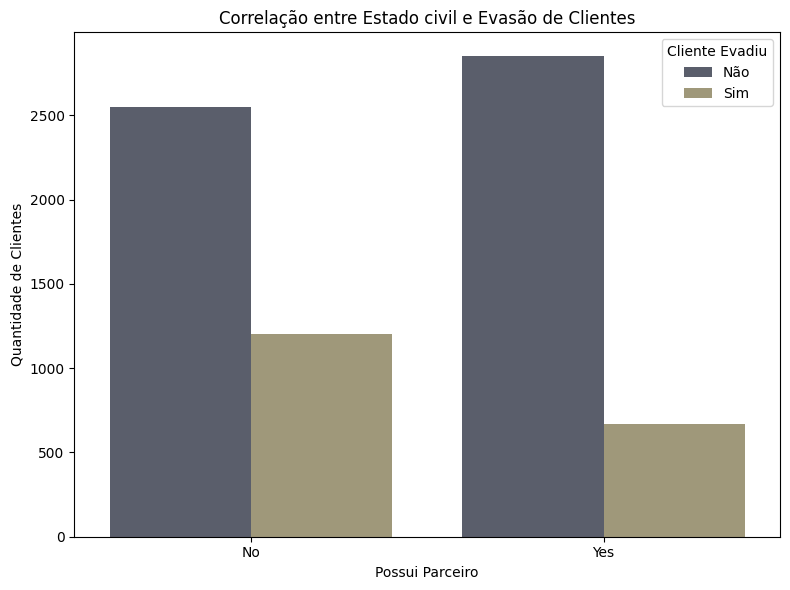

In [35]:
plt.figure(figsize=(8, 6))

# Calcular a contagem de clientes por parceria e status de churn
churn_partner_counts = dados_normalizados.groupby(['customer_Partner', 'Churn']).size().reset_index(name='count')

# Mapear os valores booleanos de 'Churn' para strings legíveis
churn_partner_counts['Churn'] = churn_partner_counts['Churn'].map({True: 'Sim', False: 'Não'})

# Criar o gráfico de barras agrupado usando seaborn
sns.barplot(
    x='customer_Partner',
    y='count',
    hue='Churn',
    data=churn_partner_counts,
    palette='cividis'
)

plt.title('Correlação entre Estado civil e Evasão de Clientes')
plt.xlabel('Possui Parceiro')
plt.ylabel('Quantidade de Clientes')
plt.legend(title='Cliente Evadiu')
plt.tight_layout()
plt.show()

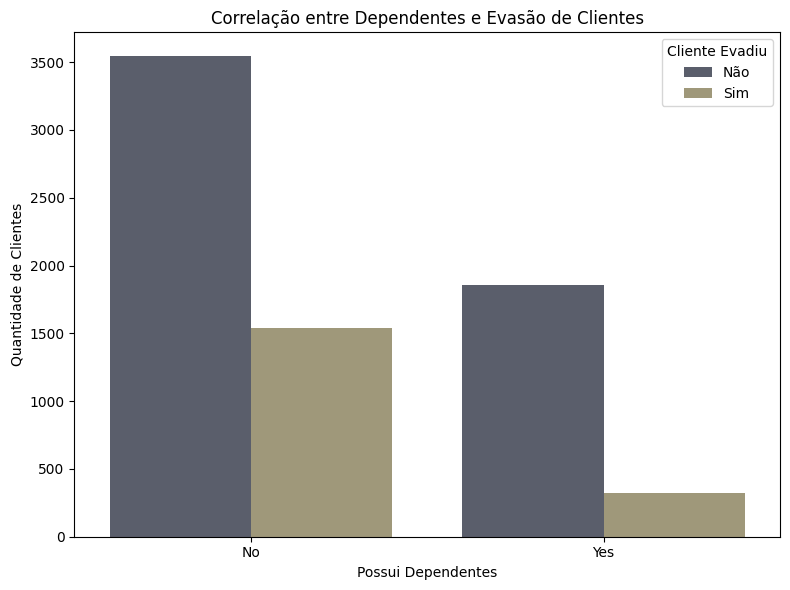

In [36]:
plt.figure(figsize=(8, 6))

# Calcular a contagem de clientes por dependência e status de churn
churn_dependents_counts = dados_normalizados.groupby(['customer_Dependents', 'Churn']).size().reset_index(name='count')

# Mapear os valores booleanos de 'Churn' para strings legíveis
churn_dependents_counts['Churn'] = churn_dependents_counts['Churn'].map({True: 'Sim', False: 'Não'})

# Criar o gráfico de barras agrupado usando seaborn
sns.barplot(
    x='customer_Dependents',
    y='count',
    hue='Churn',
    data=churn_dependents_counts,
    palette='cividis'
)

plt.title('Correlação entre Dependentes e Evasão de Clientes')
plt.xlabel('Possui Dependentes')
plt.ylabel('Quantidade de Clientes')
plt.legend(title='Cliente Evadiu')
plt.tight_layout()
plt.show()

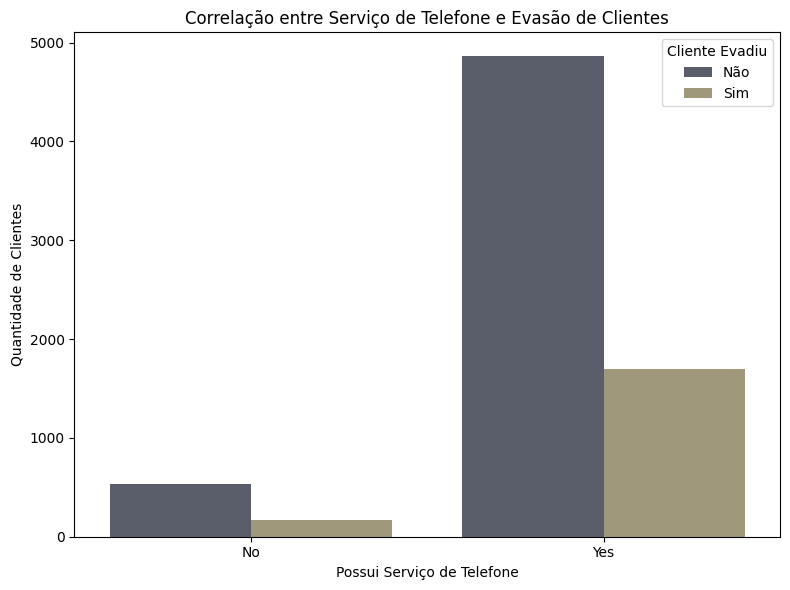

In [37]:
plt.figure(figsize=(8, 6))

# Calcular a contagem de clientes por serviço de telefone e status de churn
churn_phone_counts = dados_normalizados.groupby(['phone_PhoneService', 'Churn']).size().reset_index(name='count')

# Mapear os valores booleanos de 'Churn' para strings legíveis
churn_phone_counts['Churn'] = churn_phone_counts['Churn'].map({True: 'Sim', False: 'Não'})

# Criar o gráfico de barras agrupado usando seaborn
sns.barplot(
    x='phone_PhoneService',
    y='count',
    hue='Churn',
    data=churn_phone_counts,
    palette='cividis'
)

plt.title('Correlação entre Serviço de Telefone e Evasão de Clientes')
plt.xlabel('Possui Serviço de Telefone')
plt.ylabel('Quantidade de Clientes')
plt.legend(title='Cliente Evadiu')
plt.tight_layout()
plt.show()

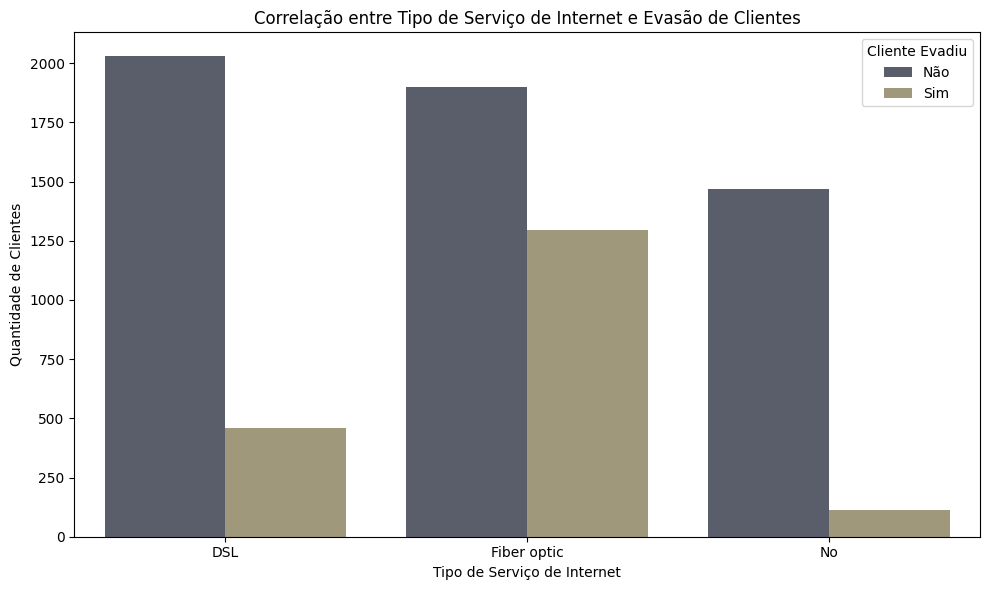

In [38]:
plt.figure(figsize=(10, 6))

# Calcular a contagem de clientes por tipo de serviço de internet e status de churn
churn_internet_counts = dados_normalizados.groupby(['internet_InternetService', 'Churn']).size().reset_index(name='count')

# Mapear os valores booleanos de 'Churn' para strings legíveis
churn_internet_counts['Churn'] = churn_internet_counts['Churn'].map({True: 'Sim', False: 'Não'})

# Criar o gráfico de barras agrupado usando seaborn
sns.barplot(
    x='internet_InternetService',
    y='count',
    hue='Churn',
    data=churn_internet_counts,
    palette='cividis'
)

plt.title('Correlação entre Tipo de Serviço de Internet e Evasão de Clientes')
plt.xlabel('Tipo de Serviço de Internet')
plt.ylabel('Quantidade de Clientes')
plt.legend(title='Cliente Evadiu')
plt.tight_layout()
plt.show()

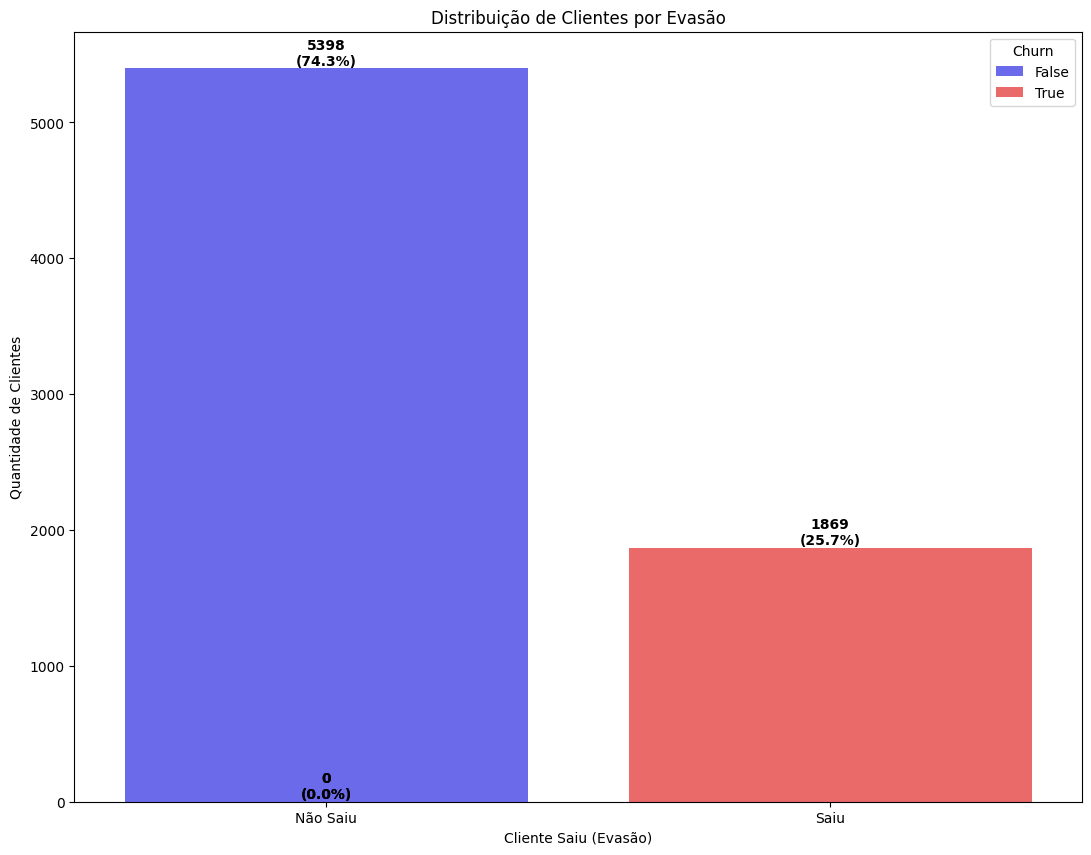

In [19]:
# Distribuição da variável 'Churn'
plt.figure(figsize=(13, 10))
ax = sns.countplot(x='Churn', data=dados_normalizados, palette='seismic', hue='Churn', legend='auto')

# Adicionar rótulos com a contagem e a porcentagem
total = len(dados_normalizados)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}\n({height/total:.1%})',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom',
                fontsize=10, fontweight='bold', color='black')

plt.title('Distribuição de Clientes por Evasão')
plt.xlabel('Cliente Saiu (Evasão)')
plt.ylabel('Quantidade de Clientes')
plt.xticks([False, True], ['Não Saiu', 'Saiu'])
plt.show()


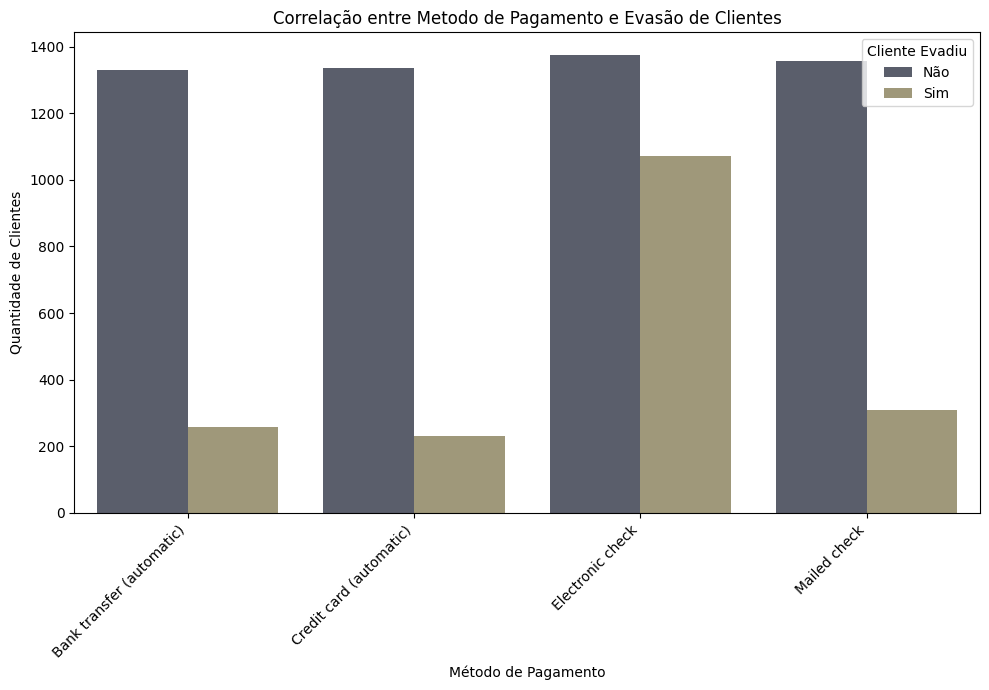

In [20]:
plt.figure(figsize=(10, 7))
# Calcular a contagem de clientes por método de pagamento e status de churn
churn_payment_counts = dados_normalizados.groupby(['account_PaymentMethod', 'Churn']).size().reset_index(name='count')
# Mapear os valores booleanos de 'Churn' para strings legíveis
churn_payment_counts['Churn'] = churn_payment_counts['Churn'].map({True: 'Sim', False: 'Não'})
# Criar o gráfico de barras agrupado usando seaborn
sns.barplot(x='account_PaymentMethod', y='count', hue='Churn', data=churn_payment_counts, palette='cividis')
plt.title('Correlação entre Metodo de Pagamento e Evasão de Clientes')
plt.xlabel('Método de Pagamento')
plt.ylabel('Quantidade de Clientes')
plt.xticks(rotation=45, ha='right') # Rotaciona os rótulos do eixo x para melhor visualização
plt.legend(title='Cliente Evadiu') # Nomeia a legenda
plt.tight_layout() # Ajusta o layout para evitar sobreposição
plt.show()

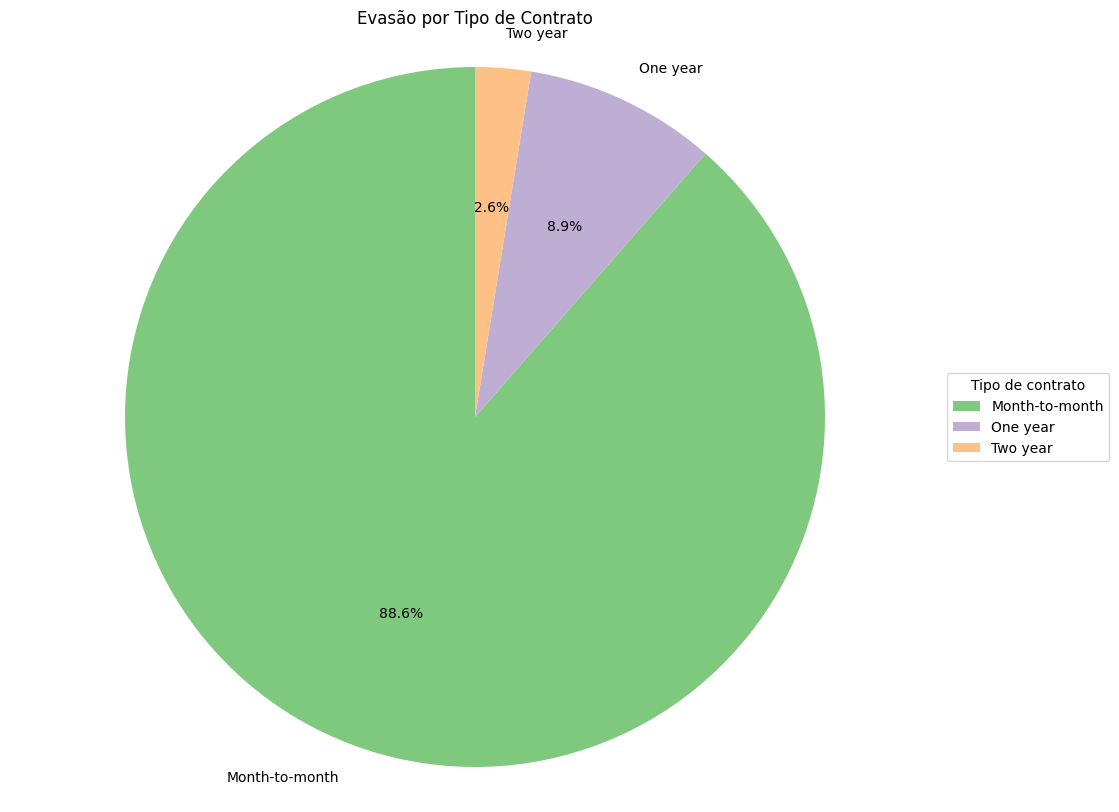

In [25]:
# prompt: usando a matplotlib criar um gráfico de pizza que demonstre a evasão por tipo de contrato, as fatias da pizza devem se chamar "Tipo de contrato"

# Contar a quantidade de clientes que evadiram por tipo de contrato
churn_by_contract = dados_normalizados[dados_normalizados['Churn'] == True]['account_Contract'].value_counts()

# Criar o gráfico de pizza
plt.figure(figsize=(12, 10))
plt.pie(churn_by_contract, labels=churn_by_contract.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Accent')[0:len(churn_by_contract)])
plt.title('Evasão por Tipo de Contrato')
plt.axis('equal')  # Mantém o gráfico de pizza circular.

# Adicionar a legenda com os nomes das fatias como "Tipo de contrato"
plt.legend(title="Tipo de contrato", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()

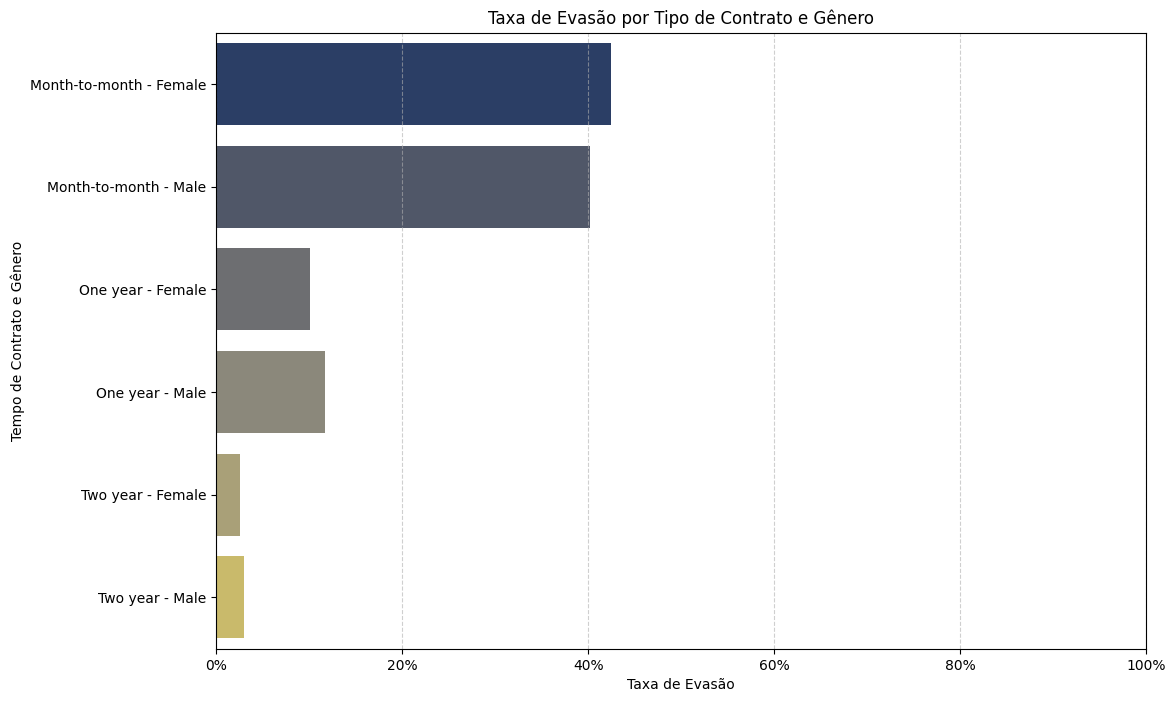

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter

# Calcular a taxa de evasão para cada combinação de tempo de contrato e gênero
churn_rate_contract_gender = dados_normalizados.groupby(['account_Contract', 'customer_gender'])['Churn'].mean().reset_index()

# Combinar as colunas de contrato e gênero para o eixo y
churn_rate_contract_gender['Contract_Gender'] = churn_rate_contract_gender['account_Contract'] + ' - ' + churn_rate_contract_gender['customer_gender']

# Criar o gráfico de barras horizontais (área)
plt.figure(figsize=(12, 8))

sns.barplot(x='Churn', y='Contract_Gender', data=churn_rate_contract_gender, palette='cividis', hue='Contract_Gender', orient='h')

plt.title('Taxa de Evasão por Tipo de Contrato e Gênero')
plt.xlabel('Taxa de Evasão')
plt.ylabel('Tempo de Contrato e Gênero')
plt.xlim(0, 1)  # Limites de 0% a 100%

# Formatar o eixo X como porcentagem
plt.gca().xaxis.set_major_formatter(PercentFormatter(1.0))

plt.grid(axis='x', linestyle='--', alpha=0.6)  # Grid horizontal

plt.show()

/tmp/ipython-input-42-914931694.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dados_normalizados, x='Churn', y='customer_tenure', palette='Set2')


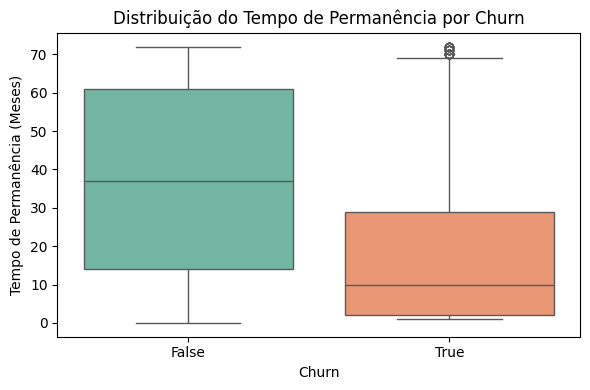

In [42]:
# Relação direta entre tempo de permanência e churn
plt.figure(figsize=(6, 4))
sns.boxplot(data=dados_normalizados, x='Churn', y='customer_tenure', palette='Set2')

plt.title("Distribuição do Tempo de Permanência por Churn")
plt.xlabel("Churn")
plt.ylabel("Tempo de Permanência (Meses)")
plt.tight_layout()
plt.show()

/tmp/ipython-input-41-2324077035.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dados_normalizados, x='Churn', y='Contas_Diarias', palette='Set2')


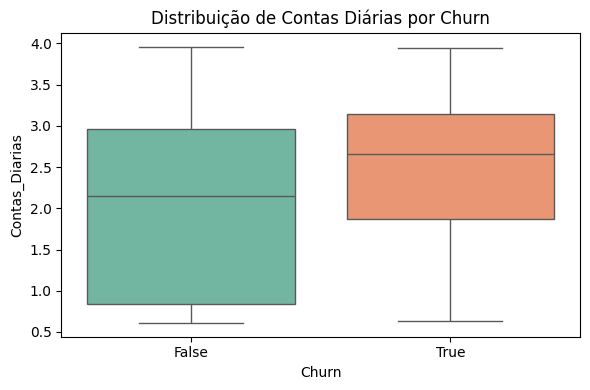

In [41]:
# Relação direta entre Contas Diárias e Churn
plt.figure(figsize=(6, 4))
sns.boxplot(data=dados_normalizados, x='Churn', y='Contas_Diarias', palette='Set2')
plt.title("Distribuição de Contas Diárias por Churn")
plt.tight_layout()
plt.show()

/tmp/ipython-input-32-2090947275.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dados_normalizados, x='Churn', y='qtd_servicos', palette='Set2')


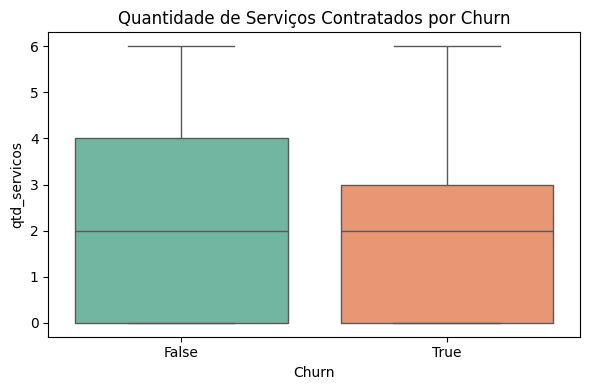

In [32]:
# Adicionar variável: quantidade de serviços contratados
servicos_bool = dados_normalizados.filter(like='internet_')                  .drop(columns=['internet_InternetService'])                  .astype(int)
dados_normalizados['qtd_servicos'] = servicos_bool.sum(axis=1)


# Relação direta entre quantidade de serviços e Churn
plt.figure(figsize=(6, 4))
sns.boxplot(data=dados_normalizados, x='Churn', y='qtd_servicos', palette='Set2')
plt.title("Quantidade de Serviços Contratados por Churn")
plt.tight_layout()
plt.show()

#📄Relatorio Final



## 📊 Relatório Analítico sobre Evasão de Clientes (Churn) - TelecomX

### 1. Introdução

A evasão de clientes, ou **Churn**, representa um dos maiores desafios para empresas de telecomunicações. Reduzir a taxa de churn é essencial para manter a base de clientes ativa, reduzir custos com aquisição de novos consumidores e aumentar a lucratividade. Este relatório visa entender os principais fatores que levam à evasão de clientes com base em dados históricos de clientes da empresa fictícia TelecomX.

---

### 2. Limpeza e Tratamento de Dados

* O dataset contém **7.267 registros** e **22 variáveis**.
* Realizamos a **conversão de tipos de dados** para análise correta: booleanos, categorias e numéricos.

---

### 3. Análise Exploratória de Dados (EDA)

#### 📌 Proporção de Churn

* **25,7%** dos clientes realizaram churn.
  

#### 📌 Correlações com o Churn

*  Clientes mais antigos tendem a permanecer.
*  Clientes com faturas mensais mais altas têm maior chance de churn.
*  Clientes que já investiram mais tendem a permanecer.

  

#### 📌 Análise Categórica

Gráficos disponíveis:

* Quantidade de Clientes por Gênero
* Custo Médio Diário por Desistência e Gênero
* Correlação entre Estado civil e Evasão de Clientes
* Correlação entre Dependentes e Evasão de Clientes
* Correlação entre Serviço de Telefone e Evasão de Clientes
* Correlação entre Tipo de Serviço de Internet e Evasão de Clientes
* Distribuição de Clientes por Evasão
* Correlação entre Metodo de Pagamento e Evasão de Clientes
* Evasão por Tipo de Contrato
* Taxa de Evasão por Tipo de Contrato e Gênero
* Distribuição do Tempo de Permanência por Churn
* Distribuição de Contas Diárias por Churn
* Quantidade de Serviços Contratados por Churn

**Destaques**:

* **Contrato mensal** apresenta churn significativamente maior.
* Clientes com **serviços de fibra ótica** têm maior evasão.
* Pagamento via **"Electronic check"** está associado a maior churn.
* Clientes sem **dependentes ou parceiros** têm maior propensão ao churn.

---

### 4. Conclusões e Insights

* **Tempo de permanência (tenure)** é o maior preditor negativo: fidelizar rapidamente reduz churn.
* Contratos **mensais** favorecem evasão — planos anuais ou bianuais reduzem a probabilidade.
* **Faturas altas e serviços intensivos** aumentam insatisfação e evasão, especialmente com Internet.
* A **forma de pagamento** tem influência comportamental significativa.
* O churn está mais relacionado com o **perfil do serviço contratado** do que com gênero ou idade.

---

### 5. Recomendações

✅ **Criar programas de fidelidade** ou bônus progressivos com o tempo de permanência.

✅ **Incentivar migração para contratos anuais** com benefícios (ex: desconto, bônus de dados).

✅ **Monitorar clientes com contas altas** e oferecer revisão de pacotes ou atendimento dedicado.

✅ **Melhorar suporte técnico**, especialmente para clientes de fibra ótica.

✅ **Analisar e intervir preventivamente** em clientes que pagam por *"Electronic check"* e estão sem parceiros/dependentes.

✅ Investir em **modelos preditivos de churn** para ações proativas de retenção.

---


Resumo estatístico:
       customer_tenure  account_Charges_Monthly  account_Charges_Total  \
count      7256.000000              7256.000000            7256.000000   
mean         32.395535                64.755423            2280.634213   
std          24.558067                30.125739            2268.632997   
min           1.000000                18.250000              18.800000   
25%           9.000000                35.450000             400.225000   
50%          29.000000                70.300000            1391.000000   
75%          55.000000                89.900000            3785.300000   
max          72.000000               118.750000            8684.800000   

       Contas_Diarias  qtd_servicos  
count     7256.000000   7256.000000  
mean         2.158467      2.034454  
std          1.004282      1.848105  
min          0.610000      0.000000  
25%          1.180000      0.000000  
50%          2.340000      2.000000  
75%          3.000000      3.000000  
max      

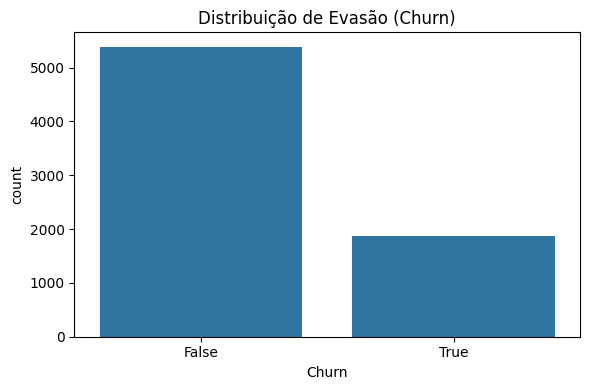

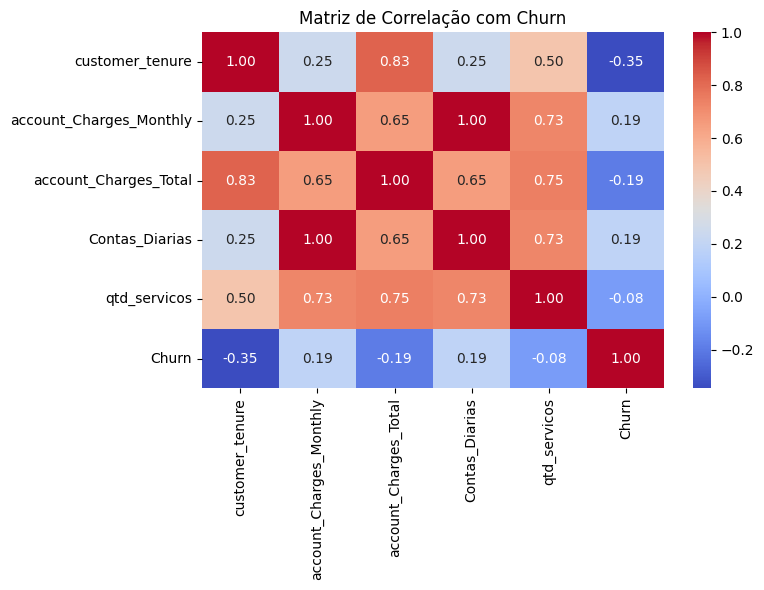

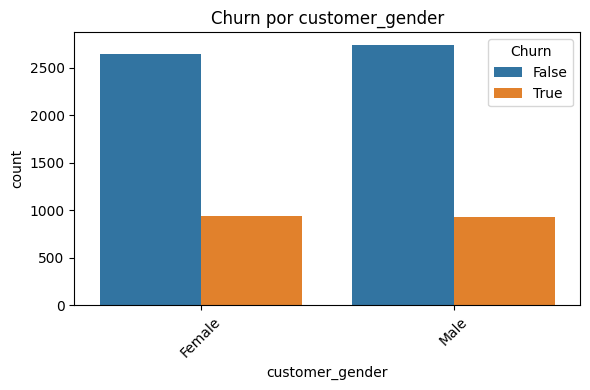

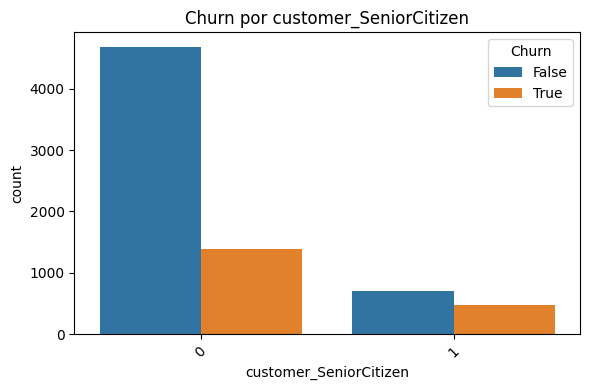

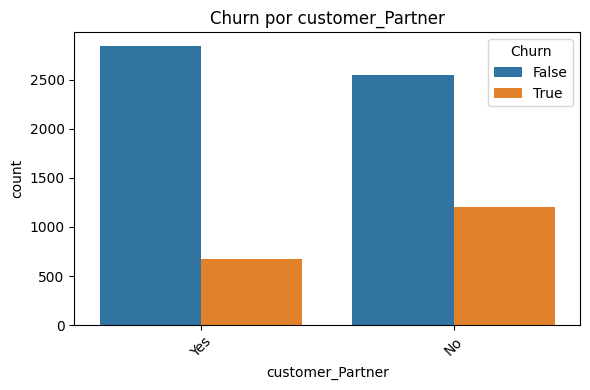

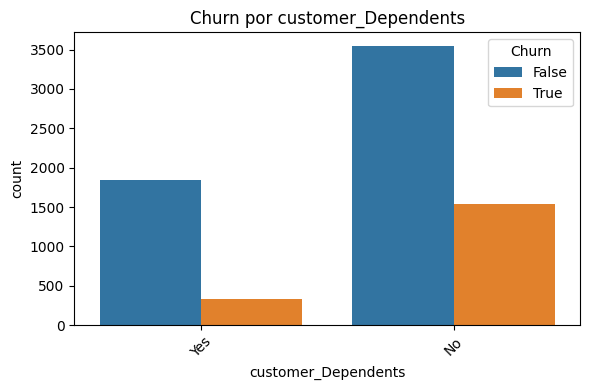

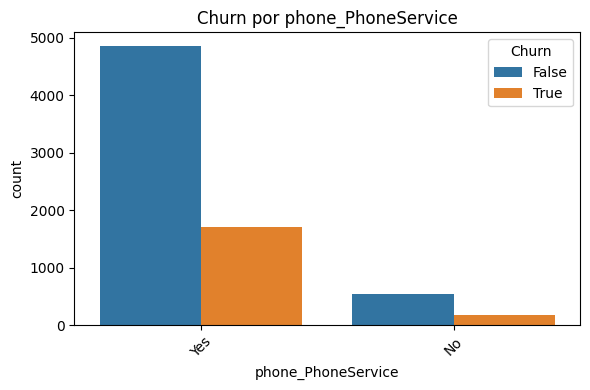

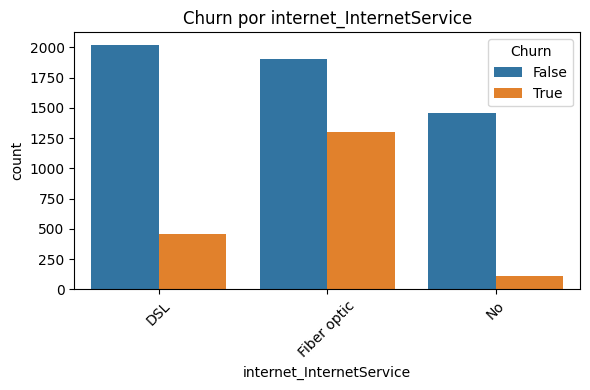

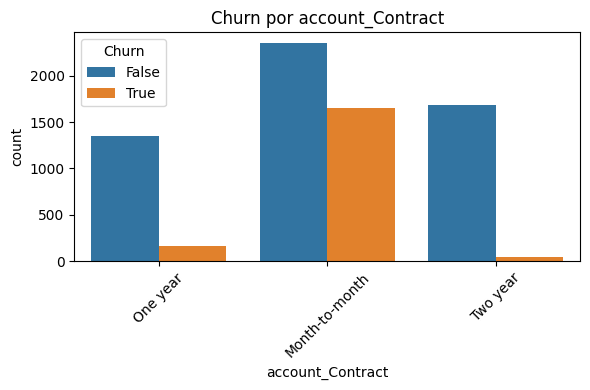

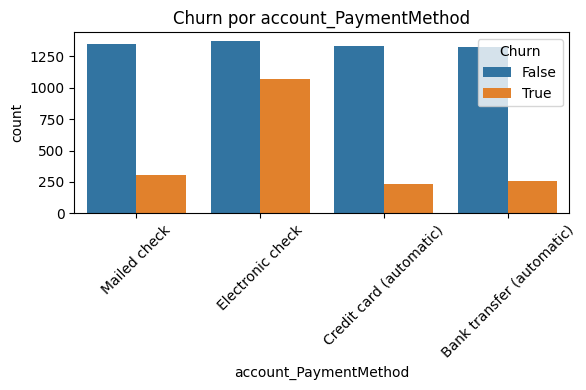

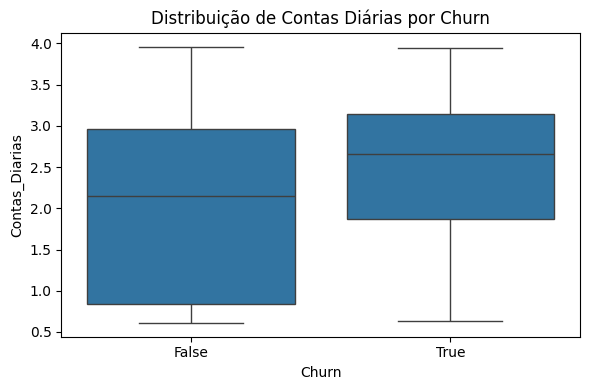

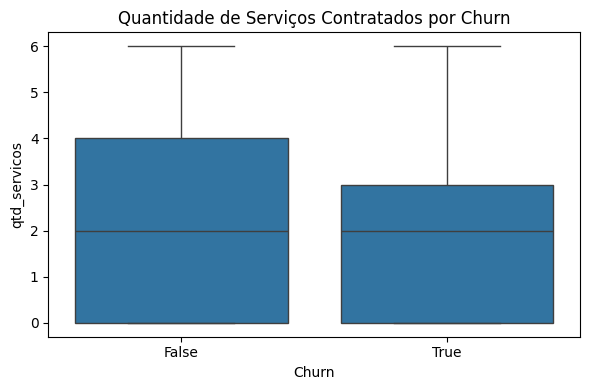

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar o dataset
df = pd.read_csv('TelecomX_Data_normalizado.csv')

# Conversão de tipos
df['Churn'] = df['Churn'].astype(bool)
df['customer_SeniorCitizen'] = df['customer_SeniorCitizen'].astype('category')
df['customer_tenure'] = df['customer_tenure'].astype(int)
df['account_Charges_Monthly'] = df['account_Charges_Monthly'].astype(float)
df['account_Charges_Total'] = pd.to_numeric(df['account_Charges_Total'], errors='coerce')

# Tratamento de valores ausentes
df.dropna(subset=['account_Charges_Total'], inplace=True)

# Adicionar variável: quantidade de serviços contratados
servicos_bool = df.filter(like='internet_')                  .drop(columns=['internet_InternetService'])                  .astype(int)
df['qtd_servicos'] = servicos_bool.sum(axis=1)

# Estatísticas descritivas
print("Resumo estatístico:")
print(df.describe())

# Distribuição de churn
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df)
plt.title('Distribuição de Evasão (Churn)')
plt.tight_layout()
plt.show()

# Correlação entre variáveis numéricas e churn
df_corr = df[['customer_tenure', 'account_Charges_Monthly', 'account_Charges_Total',
              'Contas_Diarias', 'qtd_servicos', 'Churn']].copy()
df_corr['Churn'] = df_corr['Churn'].astype(int)
correlation_matrix = df_corr.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação com Churn')
plt.tight_layout()
plt.show()

# Gráficos categóricos comparando com Churn
categorias = [
    "customer_gender", "customer_SeniorCitizen", "customer_Partner",
    "customer_Dependents", "phone_PhoneService", "internet_InternetService",
    "account_Contract", "account_PaymentMethod"
]

for col in categorias:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col, hue="Churn")
    plt.title(f'Churn por {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Relação direta entre Contas Diárias e Churn
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='Churn', y='Contas_Diarias')
plt.title("Distribuição de Contas Diárias por Churn")
plt.tight_layout()
plt.show()

# Relação direta entre quantidade de serviços e Churn
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='Churn', y='qtd_servicos')
plt.title("Quantidade de Serviços Contratados por Churn")
plt.tight_layout()
plt.show()